In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

phone=pd.read_csv(r"C:\data\data science\Study material\Data mining unsupervised learning-association rules\Datasets_Association Rules\myphonedata.csv")
phone

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [77]:
phone.isna().sum()

V1        0
V2        2
V3        7
red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [83]:
#dropping v1.v2.v3.v4.v5 columns
phone1=phone.drop(['V1', 'V2','V3'], axis=1)
phone1

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


In [87]:
duplicate=phone1.duplicated()
sum(duplicate)

3

In [88]:
phone2=phone1.drop_duplicates()
phone2

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
10,0,0,0,1,0,0


In [89]:
duplicate=phone2.duplicated()
sum(duplicate)

0

In [90]:
from collections import Counter # ,OrderedDict

item_frequencies = Counter(phone2)


In [91]:
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

In [92]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [93]:
frequencies

[1, 1, 1, 1, 1, 1]

In [94]:
items

['blue', 'orange', 'yellow', 'green', 'white', 'red']

In [95]:
#barplot of top10
import matplotlib.pyplot as plt

<ipython-input-98-f5cde9dd8659>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:6], x = list(range(0, 6)), color = 'rgbkymc')


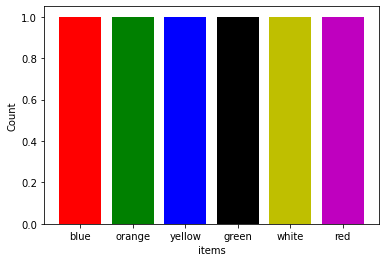

In [98]:
plt.bar(height = frequencies[0:6], x = list(range(0, 6)), color = 'rgbkymc')
plt.xticks(list(range(0, 6), ), items[0:6])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [99]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(phone2, min_support = 0.005, max_len = 4, use_colnames = True)

In [100]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)


<ipython-input-105-267c9d2b3928>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 6)), height = frequent_itemsets.support[0:6], color ='rgmyk')


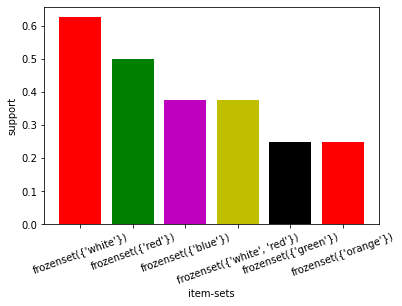

In [105]:
plt.bar(x = list(range(0, 6)), height = frequent_itemsets.support[0:6], color ='rgmyk')
plt.xticks(list(range(0, 6)), frequent_itemsets.itemsets[0:6], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()



In [106]:
rules=association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.625,0.500,0.375,0.600000,1.200000,0.062500,1.250000
1,(red),(white),0.500,0.625,0.375,0.750000,1.200000,0.062500,1.500000
2,(blue),(red),0.375,0.500,0.250,0.666667,1.333333,0.062500,1.500000
3,(red),(blue),0.500,0.375,0.250,0.500000,1.333333,0.062500,1.250000
4,(white),(orange),0.625,0.250,0.250,0.400000,1.600000,0.093750,1.250000
5,(orange),(white),0.250,0.625,0.250,1.000000,1.600000,0.093750,inf
6,(white),(blue),0.625,0.375,0.250,0.400000,1.066667,0.015625,1.041667
7,(blue),(white),0.375,0.625,0.250,0.666667,1.066667,0.015625,1.125000
8,(green),(red),0.250,0.500,0.125,0.500000,1.000000,0.000000,1.000000
9,(red),(green),0.500,0.250,0.125,0.250000,1.000000,0.000000,1.000000


In [107]:
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(red),"(white, green)",0.500,0.125,0.125,0.250000,2.000000,0.062500,1.166667
12,"(white, green)",(red),0.125,0.500,0.125,1.000000,2.000000,0.062500,inf
14,"(green, red)",(white),0.125,0.625,0.125,1.000000,1.600000,0.046875,inf
4,(white),(orange),0.625,0.250,0.250,0.400000,1.600000,0.093750,1.250000
5,(orange),(white),0.250,0.625,0.250,1.000000,1.600000,0.093750,inf
21,(white),"(red, orange)",0.625,0.125,0.125,0.200000,1.600000,0.046875,1.093750
20,"(red, orange)",(white),0.125,0.625,0.125,1.000000,1.600000,0.046875,inf
15,(white),"(green, red)",0.625,0.125,0.125,0.200000,1.600000,0.046875,1.093750
13,"(white, red)",(green),0.375,0.250,0.125,0.333333,1.333333,0.031250,1.125000
2,(blue),(red),0.375,0.500,0.250,0.666667,1.333333,0.062500,1.500000


In [108]:
def to_list(i):
    return (sorted(list(i)))

In [109]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

index_rules = []


In [110]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [111]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

In [112]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(white, green)",(red),0.125,0.500,0.125,1.000000,2.000000,0.062500,inf
4,(white),(orange),0.625,0.250,0.250,0.400000,1.600000,0.093750,1.250000
18,"(white, red)",(orange),0.375,0.250,0.125,0.333333,1.333333,0.031250,1.125000
2,(blue),(red),0.375,0.500,0.250,0.666667,1.333333,0.062500,1.500000
0,(white),(red),0.625,0.500,0.375,0.600000,1.200000,0.062500,1.250000
6,(white),(blue),0.625,0.375,0.250,0.400000,1.066667,0.015625,1.041667
24,"(white, blue)",(red),0.250,0.500,0.125,0.500000,1.000000,0.000000,1.000000
8,(green),(red),0.250,0.500,0.125,0.500000,1.000000,0.000000,1.000000
10,(red),(orange),0.500,0.250,0.125,0.250000,1.000000,0.000000,1.000000
